![](https://import.cdn.thinkific.com/220744/BExaQBPPQairRWFqxFbK_logo_mastermind_web_png)

¡Ahora es **vuestro turno!**

En este proyecto final os he adjuntado un Dataset con 27.075 juegos en **Steam**, la popular plataforma de juegos de PC. Esta lista está actualizada desde el inicio hasta Abril de 2019.

Ya que tenéis los conocimientos, os pediré que me contestéis a **10 preguntas**:
1. Cual es el TOP10 de juegos más jugados?
2. Cuál es el género de videojuegos más vendido?
3. Qué géneros tienen mejores reviews de media?
4. Cuánto ha ganado el desarrollador que más juegos ha vendido?
5. Cómo afecta a las reviews que un juego sea Early Access?
6. Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?
7. En qué mes, desde que tenemos datos, se han publicado más juegos?
8. Cuántas horas se juega de media a cada tipo de juego mensualmente?
9. Los juegos Free to Play tienen mejores o peores reviews?
10. Cómo ha evolucionado el número de achievements (trofeos) por juego?

Os dejamos via libre para contestar a estas preguntas como más os apetezca. Recordad que no hay nada de malo en consultar por internet si tenéis dudas. Las documentaciones oficiales o [Stack Overflow](https://stackoverflow.com/) son sitios geniales para ello!

Al acabar este proyecto, publicadlo en el foro donde está colgado para ver quién es el mejor!

Os dejo la guía de pasos a seguir.

Muchos ánimos!!




# Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from zipfile import ZipFile

# Consiguiendo los datos

### Conseguir link

### Descargar el archivo

In [2]:
steam_zip = ZipFile('SteamDataset-220424-201858.zip')

### Descomprimir el archivo

In [3]:
steam_zip = ZipFile('SteamDataset-220424-201858.zip')

### Construir DataFrame

In [4]:
df = pd.read_csv(steam_zip.open('steam.csv'), index_col=[0])

# Limpieza y manipulación de datos

## Quitar datos duplicados o irrelevantes

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27098     True
27099     True
27100     True
27101     True
27102     True
Length: 27103, dtype: bool

In [6]:
df = df.drop_duplicates()

## Arreglar errores estructurales

In [7]:
df.head(50)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False
5,Ricochet,2000-11-01,Valve,0,2758,684,175,3.99€,7500000.0,True,False,False,False,False,False,False,False
6,Half-Life,1998-11-08,Valve,0,27755,1100,1300,7.19€,7500000.0,True,False,False,False,False,False,False,False
7,Counter-Strike: Condition Zero,2004-03-01,Valve,0,12120,1439,427,7.19€,15000000.0,True,False,False,False,False,False,False,False
8,Half-Life: Blue Shift,2001-06-01,Gearbox Software,0,3822,420,361,3.99€,7500000.0,True,False,False,False,False,False,False,False
9,Half-Life 2,2004-11-16,Valve,33,67902,2419,691,7.19€,15000000.0,True,False,False,False,False,False,False,False


In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:

df['release_date'] = df['release_date'].dt.strftime('%d/%m/%Y')

In [10]:
genres = df[['action','adventure', 'rpg', 'simulation', 'strategy', 'racing']]

In [11]:
df['sells'] = df['sells'].apply(int)

In [12]:
df['price'] = df['price'].str.replace('€', '').apply(float)

In [13]:
df = df.drop_duplicates()

### Definir errores

Recuerda hacer una exploración de datos para encontrar estos errores. Os confirmo que hay unos cuantos!

## Filtrar outliers 

## Lidiar con NANs

In [16]:
df.isna().sum()

name                  0
release_date          0
developer             0
achievements          0
positive_ratings      0
negative_ratings      0
avg_hours_per_user    0
price                 0
sells                 0
action                0
adventure             0
rpg                   0
simulation            0
strategy              0
racing                0
free_to_play          0
early_access          0
dtype: int64

In [15]:
df.fillna("uknown", inplace=True)

## Validar nuestros datos

In [20]:

genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27075 entries, 0 to 27074
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   action      27075 non-null  bool 
 1   adventure   27075 non-null  bool 
 2   rpg         27075 non-null  bool 
 3   simulation  27075 non-null  bool 
 4   strategy    27075 non-null  bool 
 5   racing      27075 non-null  bool 
dtypes: bool(6)
memory usage: 370.2 KB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                27075 non-null  object 
 1   release_date        27075 non-null  object 
 2   developer           27075 non-null  object 
 3   achievements        27075 non-null  int64  
 4   positive_ratings    27075 non-null  int64  
 5   negative_ratings    27075 non-null  int64  
 6   avg_hours_per_user  27075 non-null  int64  
 7   price               27075 non-null  float64
 8   sells               27075 non-null  int64  
 9   action              27075 non-null  bool   
 10  adventure           27075 non-null  bool   
 11  rpg                 27075 non-null  bool   
 12  simulation          27075 non-null  bool   
 13  strategy            27075 non-null  bool   
 14  racing              27075 non-null  bool   
 15  free_to_play        27075 non-null  bool   
 16  early_acc

# EDA

## Cual es el TOP10 de juegos más jugados?

In [24]:
df[['name', 'avg_hours_per_user']].sort_values(by='avg_hours_per_user', ascending=False).head(10)

,name,avg_hours_per_user
9201,The Abbey of Crime Extensum,190625
1478,The Banner Saga: Factions,95245
6014,The Secret of Tremendous Corporation,95242
8969,PRICE,63481
3930,Boundless,55204
3969,Shroud of the Avatar: Forsaken Virtues,54618
2435,X-Plane 11,44169
23409,懒人修仙传,43632
2023,Fantasy Grounds,43074
8919,Screeps,38805


C:\Users\hugogarsan\AppData\Local\Temp\ipykernel_26684\1472164365.py:10: UserWarning: Glyph 25042 (\N{CJK UNIFIED IDEOGRAPH-61D2}) missing from current font.
  plt.tight_layout()
C:\Users\hugogarsan\AppData\Local\Temp\ipykernel_26684\1472164365.py:10: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()
C:\Users\hugogarsan\AppData\Local\Temp\ipykernel_26684\1472164365.py:10: UserWarning: Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from current font.
  plt.tight_layout()
C:\Users\hugogarsan\AppData\Local\Temp\ipykernel_26684\1472164365.py:10: UserWarning: Glyph 20185 (\N{CJK UNIFIED IDEOGRAPH-4ED9}) missing from current font.
  plt.tight_layout()
C:\Users\hugogarsan\AppData\Local\Temp\ipykernel_26684\1472164365.py:10: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  plt.tight_layout()
C:\Users\hugogarsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\

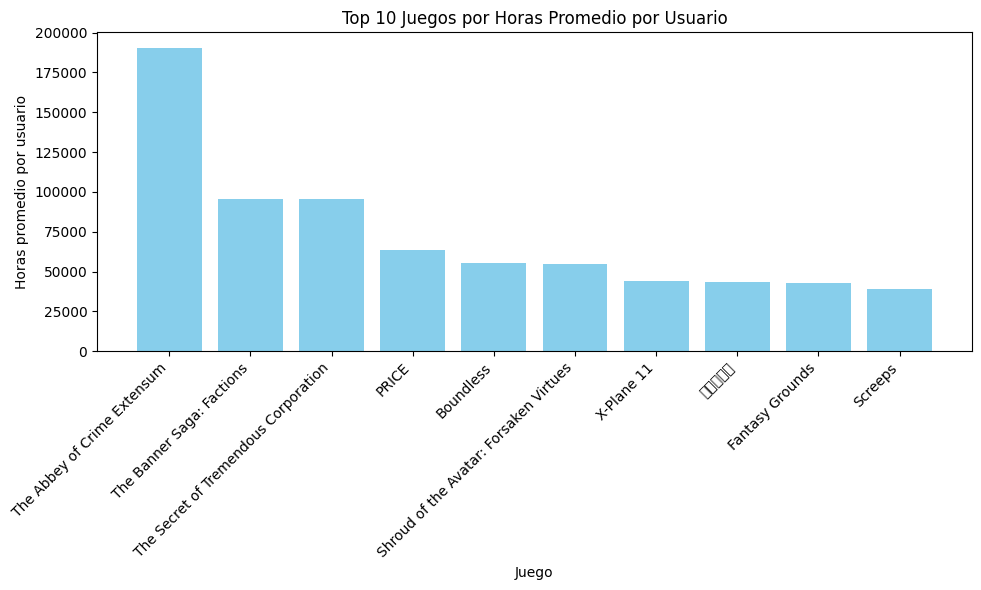

In [26]:
top_games = df[['name', 'avg_hours_per_user']].sort_values(by='avg_hours_per_user', ascending=False).head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_games['name'], top_games['avg_hours_per_user'], color='skyblue')
plt.xlabel('Juego')
plt.ylabel('Horas promedio por usuario')
plt.title('Top 10 Juegos por Horas Promedio por Usuario')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los juegos para mayor legibilidad
plt.tight_layout()

# Mostrar la gráfica
plt.show()

## Cuál es el género de videojuegos más vendido?

In [27]:
genres['sells'] = df['sells']

In [39]:
tsg = { 'sells' : [genres.loc[genres['action'] == True].sum()['sells'], genres.loc[genres['adventure'] == True].sum()['sells'], genres.loc[genres['rpg'] == True].sum()['sells'], genres.loc[genres['simulation'] == True].sum()['sells'], genres.loc[genres['strategy'] == True].sum()['sells'], genres.loc[genres['racing'] == True].sum()['sells']], 'genres': ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing']}

In [40]:
df_gmv = pd.DataFrame(tsg)
df_gmv.head()

,sells,genres
0,2361690000,action
1,1101745000,adventure
2,696865000,rpg
3,525950000,simulation
4,768050000,strategy


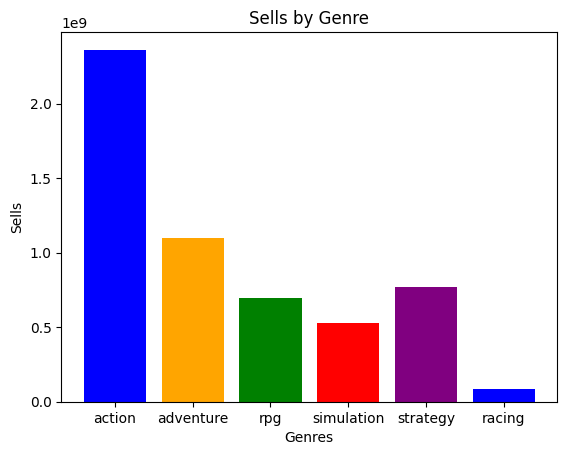

In [43]:
plt.bar(df_gmv['genres'], df_gmv['sells'], color=['blue', 'orange', 'green', 'red', 'purple'])

# Añadir etiquetas y título
plt.xlabel('Genres')
plt.ylabel('Sells')
plt.title('Sells by Genre')

# Mostrar el gráfico
plt.show()

## Qué géneros tienen mejores reviews de media?

In [44]:
genres['positive_ratings'] = df['positive_ratings']

In [47]:
gmr = { 'positive_ratings': [genres.loc[genres['action'] == True].mean()['positive_ratings'], genres.loc[genres['adventure'] == True].mean()['positive_ratings'], genres.loc[genres['rpg'] == True].mean()['positive_ratings'], genres.loc[genres['simulation'] == True].mean()['positive_ratings'], genres.loc[genres['strategy'] == True].mean()['positive_ratings'], genres.loc[genres['racing'] == True].mean()['positive_ratings']], 'genres': ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing']}
df_gmr = pd.DataFrame(gmr)
df_gmr.head()

,positive_ratings,genres
0,1581.931446,action
1,869.724083,adventure
2,1346.576896,rpg
3,819.659607,simulation
4,863.992567,strategy


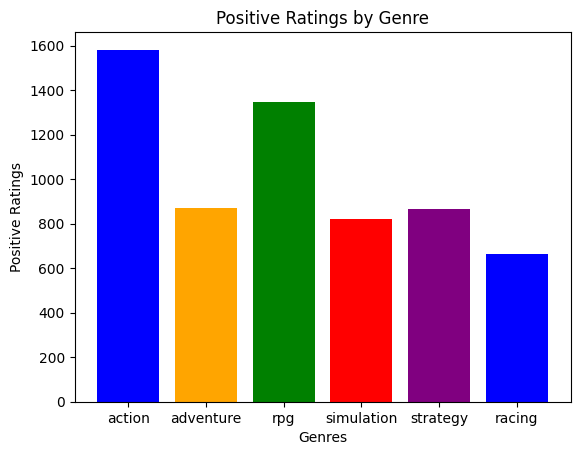

In [69]:
plt.bar(df_gmr['genres'], df_gmr['positive_ratings'], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Genres')
plt.ylabel('Positive Ratings')
plt.title('Positive Ratings by Genre')
plt.show()

## Cuánto ha ganado el desarrollador que más juegos ha vendido?

In [72]:
sales_by_developer = df.groupby('developer')['sells'].sum()

sales_by_developer.sort_values(ascending=False).max()

405750000

## Cómo afecta a las reviews que un juego sea Early Access?

## Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?

In [74]:
df.head(30)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,01/11/2000,Valve,0,124534,3339,17612,7.19,15000000,True,False,False,False,False,False,False,False
1,Team Fortress Classic,01/04/1999,Valve,0,3318,633,277,3.99,7500000,True,False,False,False,False,False,False,False
2,Day of Defeat,01/05/2003,Valve,0,3416,398,187,3.99,7500000,True,False,False,False,False,False,False,False
3,Deathmatch Classic,01/06/2001,Valve,0,1273,267,258,3.99,7500000,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,01/11/1999,Gearbox Software,0,5250,288,624,3.99,7500000,True,False,False,False,False,False,False,False
5,Ricochet,01/11/2000,Valve,0,2758,684,175,3.99,7500000,True,False,False,False,False,False,False,False
6,Half-Life,08/11/1998,Valve,0,27755,1100,1300,7.19,7500000,True,False,False,False,False,False,False,False
7,Counter-Strike: Condition Zero,01/03/2004,Valve,0,12120,1439,427,7.19,15000000,True,False,False,False,False,False,False,False
8,Half-Life: Blue Shift,01/06/2001,Gearbox Software,0,3822,420,361,3.99,7500000,True,False,False,False,False,False,False,False
9,Half-Life 2,16/11/2004,Valve,33,67902,2419,691,7.19,15000000,True,False,False,False,False,False,False,False


In [76]:
df['num_genres'] = df[['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing']].sum(axis=1)

developer_genres_count = df.groupby('developer')['num_genres'].nunique()

developer_genres_count.sort_values(ascending=False).head(10)

developer
DL Softworks             6
Riviysky                 5
Anatoliy Loginovskikh    5
10tons Ltd               5
Narko Games              5
Funcom                   5
Fury Games Production    5
Dexion Games             5
Ripknot Systems          5
Scott Cawthon            4
Name: num_genres, dtype: int64

In [78]:
df.groupby('developer')['name'].nunique()

developer
#workshop                     1
'What Day is it?' Games       1
(STCG) Smoker The Car Game    1
+7 Software                   1
+Mpact Games, LLC.            1
                             ..
魂动天下                          1
魔力乐章                          1
魔术工坊                          1
黄昏フロンティア                      2
수프림                           1
Name: name, Length: 17113, dtype: int64

## En qué mes, desde que tenemos datos, se han publicado más juegos?

## Cuántas horas se juega de media a cada tipo de juego mensualmente?

## Los juegos Free to Play tienen mejores o peores reviews?

## Cómo ha evolucionado el número de achievements (trofeos) por juego?

## Bonus! Si tienes curiosidad, y quieres contestar más preguntas, puedes resolverlas aquí mismo!